In [40]:
import pandas as pd
import numpy as np
# Setting display width for pandas DataFrame
pd.set_option('display.width', 10000)
pd.set_option('display.max_columns', None)

In [41]:
def generate_synthetic_data(num_rows):
    start_date = pd.to_datetime('2021-01-01')
    end_date = pd.to_datetime('2023-12-31')
    date_range = pd.date_range(start=start_date, end=end_date)
    
    num_days = len(date_range)
    period = 365
    phase_shift = 0
    amplitude = 10
    temperature_mean = 20
    temperature = amplitude * np.sin(2 * np.pi * np.arange(num_days) / period + phase_shift) + temperature_mean
    
    lemonade_demand = np.random.randint(100, 500, size=num_days)
    iced_tea_demand = np.random.randint(100, 500, size=num_days)
    lemonade_demand[temperature > 25] += 150
    iced_tea_demand[temperature > 25] += 100
    lemonade_demand[temperature < 25] -= 150
    iced_tea_demand[temperature < 25] -= 200
    
    hot_cocoa_demand = np.random.randint(100, 500, size=num_days)
    snacks_demand = np.random.randint(100, 500, size=num_days)
    snacks_demand[temperature > 25] -= 150
    hot_cocoa_demand[temperature > 25] -= 200
    snacks_demand[temperature < 25] += 150 
    hot_cocoa_demand[temperature < 25] += 100
    
    # Ensure demand cannot be less than 0
    lemonade_demand[lemonade_demand < 0] = 0
    iced_tea_demand[iced_tea_demand < 0] = 0
    hot_cocoa_demand[hot_cocoa_demand < 0] = 0
    snacks_demand[snacks_demand < 0] = 0
    
    demand_data = pd.DataFrame({
        'date': date_range,
        'temperature': temperature,
        'lemonade_demand': lemonade_demand,
        'iced_tea_demand': iced_tea_demand,
        'hot_cocoa_demand': hot_cocoa_demand,
        'snacks_demand': snacks_demand
    })

    return demand_data

# Generate synthetic data with 3 years of historical demand data
demand_data = generate_synthetic_data(num_rows=1095)  # 365 days * 3 years

print(demand_data.head())
print(demand_data.describe())

        date  temperature  lemonade_demand  iced_tea_demand  hot_cocoa_demand  snacks_demand
0 2021-01-01    20.000000                4               17               357            604
1 2021-01-02    20.172134                0                0               221            635
2 2021-01-03    20.344216              196               76               336            611
3 2021-01-04    20.516197              154               73               409            630
4 2021-01-05    20.688024              332               96               325            371
       temperature  lemonade_demand  iced_tea_demand  hot_cocoa_demand  snacks_demand
count  1095.000000      1095.000000      1095.000000       1095.000000    1095.000000
mean     20.000000       251.016438       208.717808        304.185388     350.779909
std       7.074299       181.077649       171.347375        172.957777     181.157077
min      10.000093         0.000000         0.000000          0.000000       0.000000
25%      12.

In [42]:
# Introduce missing values, format inconsistencies, and negative values at fixed row indices
fixed_rows_with_missing_values_lemonade = [1090 , 3, 6, 9, 12, 15, 18, 21, 24, 27]
demand_data.loc[fixed_rows_with_missing_values_lemonade, 'lemonade_demand'] = np.nan

fixed_rows_with_missing_values_iced_tea = [1, 4, 7, 1094, 13]
demand_data.loc[fixed_rows_with_missing_values_iced_tea, 'iced_tea_demand'] = np.nan

fixed_rows_with_missing_values_iced_tea = [ 28, 31, 34, 37, 40, 43]
demand_data.loc[fixed_rows_with_missing_values_iced_tea, 'snacks_demand'] = np.nan

fixed_rows_with_format_inconsistencies_hot_cocoa = [1093, 14, 17]
demand_data.loc[fixed_rows_with_format_inconsistencies_hot_cocoa, 'hot_cocoa_demand'] = -1

fixed_rows_with_negative_values_snacks = [30, 33, 36, 39,1092, 45, 48, 51]
demand_data.loc[fixed_rows_with_negative_values_snacks, 'snacks_demand'] = -1

# Print the DataFrame to show all inconsistencies
print(demand_data.tail())

           date  temperature  lemonade_demand  iced_tea_demand  hot_cocoa_demand  snacks_demand
1090 2023-12-27    19.140352              NaN              0.0               520          509.0
1091 2023-12-28    19.311976            164.0            288.0               374          529.0
1092 2023-12-29    19.483803             57.0              0.0               219           -1.0
1093 2023-12-30    19.655784             96.0            272.0                -1          455.0
1094 2023-12-31    19.827866            296.0              NaN               383          590.0


In [43]:
print(demand_data.describe())

       temperature  lemonade_demand  iced_tea_demand  hot_cocoa_demand  snacks_demand
count  1095.000000      1085.000000      1090.000000       1095.000000    1089.000000
mean     20.000000       251.461751       209.334862        302.883105     349.792470
std       7.074299       181.688822       171.404828        173.409352     182.580943
min      10.000093         0.000000         0.000000         -1.000000      -1.000000
25%      12.944164       100.000000        49.750000        199.000000     243.000000
50%      20.000000       251.000000       197.500000        296.000000     351.000000
75%      27.055836       348.000000       298.750000        443.000000     495.000000
max      29.999907       649.000000       599.000000        599.000000     649.000000


In [44]:
# Count NaN values in numerical columns
nan_counts = demand_data.select_dtypes(include=['number']).isna().sum()

# Count negative values in numerical columns
negative_counts = (demand_data.select_dtypes(include=['number']) < 0).sum().sum()

print("Number of NaN values in each numerical column:")
print(nan_counts)
print("Number of negative values in numerical columns:", negative_counts)


Number of NaN values in each numerical column:
temperature          0
lemonade_demand     10
iced_tea_demand      5
hot_cocoa_demand     0
snacks_demand        6
dtype: int64
Number of negative values in numerical columns: 11


In [45]:
# Step 1: Replacing Negative Values with 0
numerical_columns = demand_data.select_dtypes(include=['number']).columns
demand_data[numerical_columns] = demand_data[numerical_columns].clip(lower=0)

# Step 2: Filling NaN Values with the Mean of Previous and Next
demand_data[numerical_columns] = demand_data[numerical_columns].fillna(method='ffill')
demand_data[numerical_columns] = demand_data[numerical_columns].fillna(method='bfill')

# Count NaN values in numerical columns
nan_counts = demand_data.select_dtypes(include=['number']).isna().sum()
# Count negative values in numerical columns
negative_counts = (demand_data.select_dtypes(include=['number']) < 0).sum().sum()

print("Number of NaN values in each numerical column:")
print(nan_counts)
print("Number of negative values in numerical columns:", negative_counts)

Number of NaN values in each numerical column:
temperature         0
lemonade_demand     0
iced_tea_demand     0
hot_cocoa_demand    0
snacks_demand       0
dtype: int64
Number of negative values in numerical columns: 0


In [46]:
# Extract date features
demand_data['day'] = demand_data['date'].dt.day
demand_data['month'] = demand_data['date'].dt.month
demand_data['year'] = demand_data['date'].dt.year

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Defining the features and target variables
X = demand_data[['day', 'month', 'year', 'temperature']]
y = demand_data[['lemonade_demand', 'iced_tea_demand', 'hot_cocoa_demand', 'snacks_demand']]

# Model Training (Random Forest Regressor)
models = {}
for product in y.columns:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y[product])  # Train on the entire historical dataset
    models[product] = model


In [48]:
# Generate synthetic data for the year 2024
future_data_2024 = generate_synthetic_data(num_rows=365)

# Extract date features for the future data
future_data_2024['day'] = future_data_2024['date'].dt.day
future_data_2024['month'] = future_data_2024['date'].dt.month
future_data_2024['year'] = future_data_2024['date'].dt.year

In [49]:
#Predict demand for each month of the year 2024
forecasted_demand_2024 = {}
for product in y.columns:
    forecasted_demand_2024[product] = np.zeros(12)  # Initialize an array to store the forecasted demand for each month
    for month in range(1, 13):
        # Filter the future data for the specific month
        future_data_month = future_data_2024[future_data_2024['month'] == month]
        # Predict demand for the specific month
        forecasted_demand_2024[product][month - 1] = models[product].predict(future_data_month[['day', 'month', 'year', 'temperature']])[0]


In [50]:
from sklearn.metrics import mean_absolute_error

# Model Evaluation
for product in y.columns:
    y_pred = models[product].predict(X)
    mae = mean_absolute_error(y[product], y_pred)
    print(f"Product: {product}")
    print(f"Mean Absolute Error (MAE): {mae}")

Product: lemonade_demand
Mean Absolute Error (MAE): 40.901251141552514
Product: iced_tea_demand
Mean Absolute Error (MAE): 37.111625570776255
Product: hot_cocoa_demand
Mean Absolute Error (MAE): 39.36709589041096
Product: snacks_demand
Mean Absolute Error (MAE): 40.035616438356165


In [55]:
# Convert forecasted_demand_2024 into a DataFrame
forecasted_demand_2024_df = pd.DataFrame(forecasted_demand_2024)

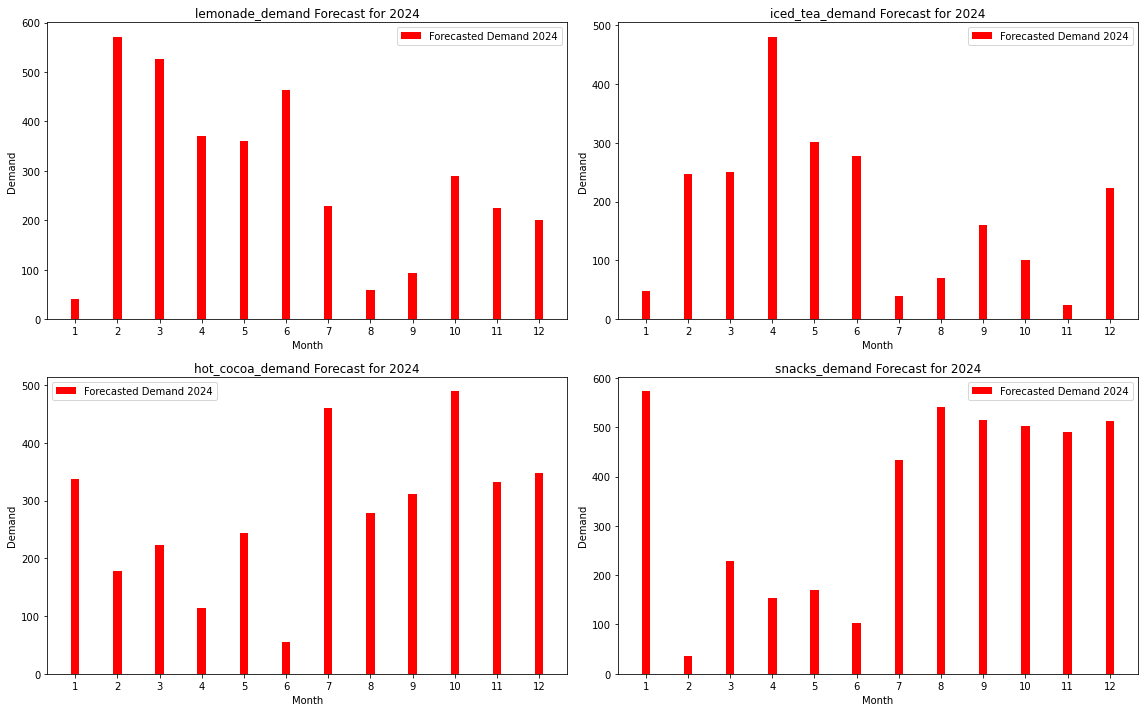

In [61]:
# Visualizing using MATPLOTLIB

import matplotlib.pyplot as plt
# Visualizing the forecasted demand for the year 2024 using bar plots for each month
plt.figure(figsize=(16, 10))

months = range(1, 13)
bar_width = 0.2
index = np.arange(len(months))

for i, product in enumerate(y.columns, 1):
    plt.subplot(2, 2, i)
    plt.bar(index, forecasted_demand_2024[product], color='red', width=bar_width, label='Forecasted Demand 2024')
    plt.xlabel('Month')
    plt.ylabel('Demand')
    plt.title(f'{product} Forecast for 2024')
    plt.xticks(index, months)  # Set xticks to display month numbers
    plt.legend()

plt.tight_layout()
plt.show()


In [62]:
# Visualizing using plotly

import plotly.graph_objects as go
#  Visualize the forecasted demand for the year 2024 using bar plots for each month with Plotly
fig = go.Figure()
# Define a color palette for the products
colors = ['blue', 'green', 'orange', 'red']
months = list(range(1, 13))  # Convert range to list
bar_width = 0.2
index = np.arange(len(months))

for i, product in enumerate(y.columns, 1):
    fig.add_trace(go.Bar(
        x=months,
        y=forecasted_demand_2024[product],
        name=f'{product} ',
        marker_color=colors[i-1],  # Assign color from the color palette
        hoverinfo='y',
        text=[f'Forecasted Demand: {int(val)}' for val in forecasted_demand_2024[product]],
        textposition='outside',
        textfont=dict(color='black'),
        opacity=0.8
    ))

fig.update_layout(
    title='Forecasted Demand for 2024',
    xaxis_title='Month',
    yaxis_title='Demand',
    barmode='group',
    showlegend=True,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    xaxis=dict(
        tickmode='array',  # Set tick mode to array
        tickvals=list(range(1, 13)),  # Specify tick values as month numbers
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],  # Specify tick text as month names
    )
)
fig.show()

In [63]:
# Visualizing using plotly animated bar graphs (to be debugged)
import plotly.graph_objects as go

# Define a color palette for the products
colors = ['blue', 'green', 'orange', 'red']

# Create traces for each product with different colors
traces = []
legends = []  # List to hold legend traces
for i, product in enumerate(y.columns):
    traces.append(go.Bar(
        x=months,
        y=forecasted_demand_2024[product],
        name=product,
        marker_color=colors[i],  # Assign color from the color palette
        hoverinfo='y',
        text=[f'Forecasted Demand: {int(val)}' for val in forecasted_demand_2024[product]],
        textposition='outside',
        textfont=dict(color='black'),
        opacity=0.8,
        showlegend=False  # Disable legend for individual traces
    ))
    # Create legend traces
    legends.append(go.Bar(
        x=[None],
        y=[None],
        name=product,
        marker_color=colors[i],
        showlegend=True
    ))

# Create frames for animation
frames = []
for product, trace in zip(y.columns, traces):
    initial_frame = go.Frame(data=[trace], name=f'Initial {product}')
    final_frame = go.Frame(data=[trace], name=f'Final {product}')
    frames.extend([initial_frame, final_frame])

# Create slider steps
steps = []
for product in y.columns:
    initial_step = {
        "args": [[f'Initial {product}'], {"frame": {"duration": 1000, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
        "label": product,
        "method": "animate"
    }
    final_step = {
        "args": [[f'Final {product}'], {"frame": {"duration": 1000, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
        "label": product,
        "method": "animate"
    }
    steps.extend([initial_step, final_step])

# Create figure
fig = go.Figure(
    data=traces + legends,  # Add legends to the data list
    layout=go.Layout(
        title='Forecasted Demand for 2024',
        xaxis_title='Month',
        yaxis_title='Demand',
        barmode='group',
        showlegend=True,
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        xaxis=dict(
            tickmode='array',  # Set tick mode to array
            tickvals=list(range(1, 13)),  # Specify tick values as month numbers
            ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],  # Specify tick text as month names
        ),
        updatemenus=[{
            "buttons": [{
                "args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}],
                "label": "Play",
                "method": "animate"
            }, {
                "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }],
            "direction": "left",
            "pad": {"r": 10, "t": 87},
            "showactive": False,
            "type": "buttons",
            "x": 0.1,
            "xanchor": "right",
            "y": 0,
            "yanchor": "top"
        }],
        sliders=[{
            "active": 0,
            "steps": steps,
            "y": 0,
            "x": 0.1,
            "pad": {"t": 50, "b": 10},
            "len": 0.9,
            "xanchor": "left",
            "yanchor": "top",
            "currentvalue": {
                "visible": False,
                "prefix": "Product: ",
                "xanchor": "right"
            }
        }]
    ),
    frames=frames
)

fig.show()
